In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy.spatial import ConvexHull
from tqdm import tqdm
import random
plt.style.use('ggplot')
import pickle
from sklearn import tree
from sklearn.tree import export_graphviz
from joblib import dump, load
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
%matplotlib inline
from sklearn.impute import SimpleImputer
from scipy import interpolate
from scipy.interpolate import interp1d


In [75]:
MAX_DEPTH=6
NUMESTIMATORS=2

In [76]:
Ef=pd.read_excel('./2022summer/adeptphase3/BIOTYPES_HC_withBiofactors_21_1008.xlsx')
Ef_=Ef[['DSM','DSM String']].dropna()
#Ef_=Ef['DSM'].dropna().astype(int)
Ef_.DSM=[int(x) for x in Ef_.DSM.values]
xf=pd.read_csv('./2022summer/adeptphase2/Cognition.csv',index_col=0)
xf.index.name='subject_id'
df=pd.read_csv('combined_bsnip.csv',index_col=0).drop('DSM',axis=1)
#df=df.join(xf)#.head()
#df=df.join(Ef_.set_index('Subid'))

DELVAR=['project','BACS_COMP_Z']
cols=[x for x in df.columns if x not in DELVAR]
df=df[cols]

df=df.join(Ef_).dropna()#[['DSM','Biotype']]
df.DSM=df.DSM.values.astype(int)
df00=df.copy()#[['DSM','Biotype']]
df=df[df['DSM String']!='HC'].drop(['Biotype','DSM String'],axis=1)
#df=df.drop(['Biotype','DSM String'],axis=1)
df00#.DSM.value_counts()

#xf=pd.read_csv('./2022summer/adeptphase2/Cognition.csv',index_col=0)
#xf.index.name='subject_id'
#df=pd.read_csv('combined_bsnip.csv',index_col=0).drop('DSM',axis=1)
#df=df.join(xf)#.head()
#df=df.join(Ef_.set_index('Subid'))

,Biotype,panss_p1,panss_p2,panss_p3,panss_p4,panss_p5,panss_p6,panss_p7,panss_n1,panss_n2,...,young_11,sfs_setotal,sfs_ictotal,sfs_ipcptotal,sfs_ipcctotal,sfs_retotal,sfs_prototal,sfs_oetotal,DSM,DSM String
subject_id,,,,,,,,,,,,,,,,,,,,,
53,2,4.0,3.0,5.0,2.0,1.0,3.0,1.0,5.0,1.0,...,0.0,10.0,4.0,24.0,31.0,10.0,17.0,0.0,5,SADP
73,2,6.0,5.0,6.0,4.0,5.0,6.0,6.0,1.0,4.0,...,4.0,7.0,7.0,21.0,18.0,15.0,11.0,10.0,2,BPP
78,1,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,...,0.0,9.0,9.0,36.0,39.0,13.0,12.0,1.0,3,HC
92,1,1.0,1.0,1.0,1.0,3.0,4.0,2.0,1.0,2.0,...,0.0,7.0,6.0,13.0,35.0,15.0,10.0,3.0,5,SADP
110,3,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,0.0,14.0,9.0,34.0,39.0,30.0,39.0,10.0,5,SADP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,3,1.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,3.0,...,0.0,12.0,9.0,10.0,35.0,15.0,25.0,3.0,5,SADP
2753,2,3.0,3.0,2.0,2.0,5.0,5.0,3.0,1.0,2.0,...,0.0,10.0,8.0,27.0,31.0,24.0,24.0,10.0,3,HC
2764,1,4.0,2.0,4.0,1.0,3.0,3.0,2.0,2.0,1.0,...,0.0,12.0,9.0,25.0,13.0,15.0,8.0,4.0,1,SZP


In [77]:
#DELVAR=['project']#,'BACS_COMP_Z']
#cols=[x for x in df.columns if x not in DELVAR]
#df=df[cols]

In [78]:
#df=pd.read_csv('combined_bsnip.csv',index_col=0).drop('DSM',axis=1)
#df=df.drop('project',axis=1)
#df=df.drop('BACS_COMP_Z_within',axis=1)
#df.head()

In [79]:
feature_names=df.columns
feature_names=feature_names[1:]
feature_names

Index(['panss_p2', 'panss_p3', 'panss_p4', 'panss_p5', 'panss_p6', 'panss_p7',
       'panss_n1', 'panss_n2', 'panss_n3', 'panss_n4', 'panss_n5', 'panss_n6',
       'panss_n7', 'panss_g1', 'panss_g2', 'panss_g3', 'panss_g4', 'panss_g5',
       'panss_g6', 'panss_g7', 'panss_g8', 'panss_g9', 'panss_g10',
       'panss_g11', 'panss_g12', 'panss_g13', 'panss_g14', 'panss_g15',
       'panss_g16', 'madrs_1', 'madrs_2', 'madrs_3', 'madrs_4', 'madrs_5',
       'madrs_6', 'madrs_7', 'madrs_8', 'madrs_9', 'madrs_10', 'young_1',
       'young_2', 'young_3', 'young_4', 'young_5', 'young_6', 'young_7',
       'young_8', 'young_9', 'young_10', 'young_11', 'sfs_setotal',
       'sfs_ictotal', 'sfs_ipcptotal', 'sfs_ipcctotal', 'sfs_retotal',
       'sfs_prototal', 'sfs_oetotal', 'DSM'],
      dtype='object')

In [80]:
#df=df[df['Biotype']==3]
df=df.dropna()
df0=df
[p1,p2,p3]=(df0.DSM.value_counts()/df0.DSM.value_counts().sum()).values

In [81]:
df.DSM.value_counts()
# 3 is HC

1    52
5    38
2    28
Name: DSM, dtype: int64

In [82]:
# load model
import dill
with open('/home/ishanu/DSMmodels/DSM_12_10_26.mod','rb') as f:
    M=dill.load(f)

    

Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [83]:
M.keys()

dict_keys([1, 2, 5])

In [84]:
import shap
clfA=M[2]['estimator']
clfB=M[5]['estimator']
clfC=M[1]['estimator']


In [85]:
th1=M[2]['rocs'][list(M[2]['rocs'].keys())[0]]['thresholds'][1]#['thresholds']
th2=M[5]['rocs'][list(M[5]['rocs'].keys())[0]]['thresholds'][1]#['thresholds']
print(th1,th2)

0.4789473684210526 0.30524819428420913


In [86]:
def prob_(x):
    a=clfA.predict_proba(x.reshape(1, -1))
    b=clfB.predict_proba(x.reshape(1, -1))
    #print(a)
    if a[0][0] > th1:
        d=2
    else:
        if b[0][0] > th2:
            d=3
        else:
            d=1
    return d

In [87]:
def prob__(X):
    return 1+(clfA.predict_proba(X)[:,0]>th1)*1+(clfB.predict_proba(X)[:,0]>th2)*2


In [88]:
df=df0
X=df.drop('DSM',axis=1).values
y=df.DSM.values#.astype(str)
y=[(int(x)==2)+0 for x in y ]

In [89]:
explainerX = shap.Explainer(prob__,X)
shap_valuesX=explainerX(df.drop('DSM',axis=1))

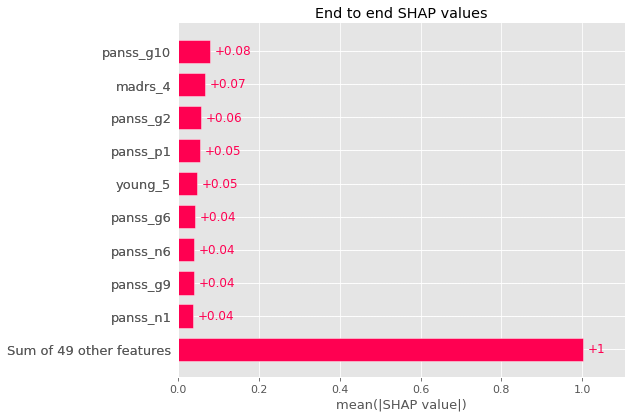

In [90]:
shap.plots.bar(shap_valuesX, show=False)
plt.title('End to end SHAP values')
plt.savefig('./phase1results_new/shapXDSM1210.png',dpi=300,bbox_inches='tight',transparent=True)

In [91]:
explainer = shap.Explainer(clfA.predict,X)
shap_values=explainer(df.drop('DSM',axis=1))

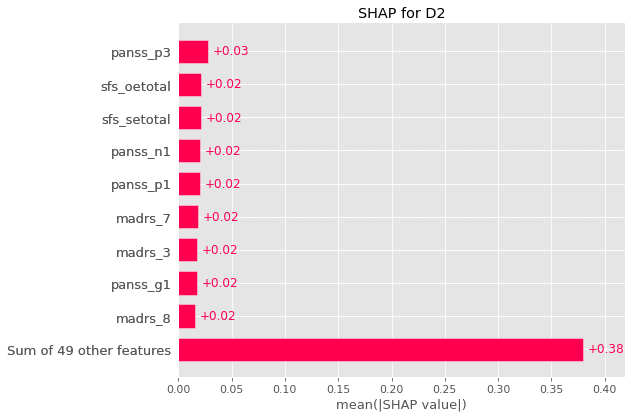

In [92]:
shap.plots.bar(shap_values,show=False)
plt.title('SHAP for D2')
plt.savefig('./phase1results_new/shap2DSM1210.png',dpi=300,bbox_inches='tight',transparent=True)

In [93]:
df=df0
X=df.drop('DSM',axis=1).values
y=df.DSM.values#.astype(str)
y=[(int(x)==5)+0 for x in y ]

In [94]:
explainerb = shap.Explainer(clfB.predict,X)
shap_valuesb=explainerb(df.drop('DSM',axis=1))

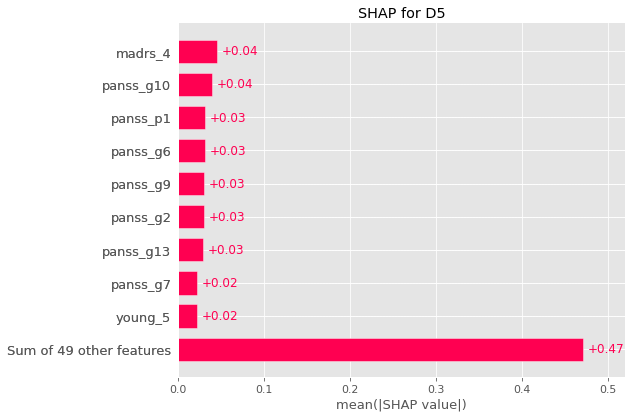

In [95]:
shap.plots.bar(shap_valuesb,show=False)
plt.title('SHAP for D5')

plt.savefig('./phase1results_new/shap5DSM1210.png',dpi=300,bbox_inches='tight',transparent=True)

In [96]:
df=df0
X=df.drop('DSM',axis=1).values
y=df.DSM.values#.astype(str)
y=[(int(x)==1)+0 for x in y ]

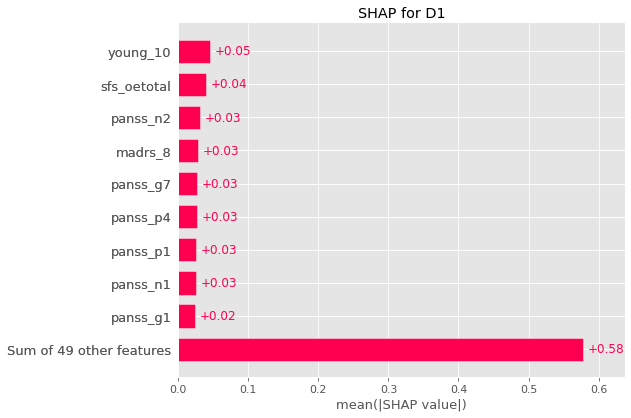

In [97]:
explainerC = shap.Explainer(clfC.predict,X)
shap_valuesC=explainerC(df.drop('DSM',axis=1))
shap.plots.bar(shap_valuesC,show=False)
plt.title('SHAP for D1')

plt.savefig('./phase1results_new/shap1DSM1210.png',dpi=300,bbox_inches='tight',transparent=True)